In [1]:
from skimage import data
from skimage import io

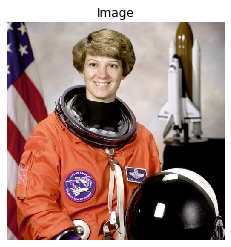

In [7]:
astro_image = data.astronaut()
type(astro_image)
show_image(astro_image)

In [8]:
from matplotlib import pyplot as plt
def show_image(image, title='Image', cmap_type='gray'): 
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [9]:
from skimage import color
from skimage.color import rgb2gray
#transformar a escala de grises 
grayscale = color.rgb2gray(astro_image)
#transformar a color
#rgb = color.gray2rgb(grayscale)

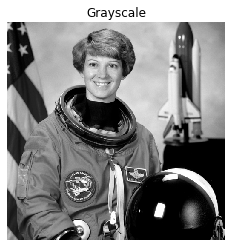

In [10]:
#mostrar imagen
show_image(grayscale, "Grayscale")

# NumPy para imágenes

In [11]:
import numpy as np

In [12]:
 # Cargar la imagen usando Matplotlib
halo_image = plt.imread('primerhalo.png') 
type(halo_image)

numpy.ndarray

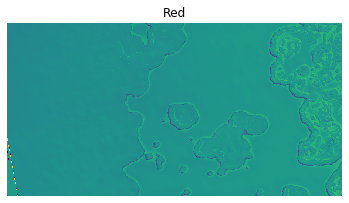

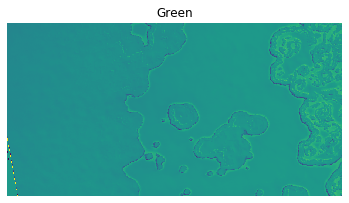

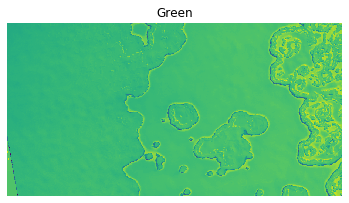

In [13]:
# Obteniendo los valores rojos de la imagen
red = halo_image[:, :, 0]
plt.imshow(red) 
plt.title('Red') 
plt.axis('off')
plt.show()
# Obteniendo los valores verdes de la imagen
green = halo_image[:, :, 1]
plt.imshow(green) 
plt.title('Green') 
plt.axis('off')
plt.show()
# Obteniendo los valores azules de la imagen
blue = halo_image[:, :, 2]
plt.imshow(blue) 
plt.title('Green') 
plt.axis('off')
plt.show()

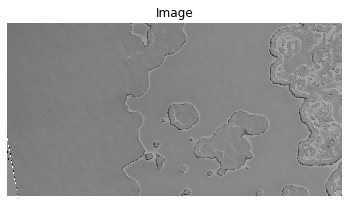

In [14]:
show_image(red)

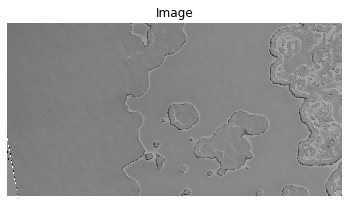

In [15]:
show_image(green) 

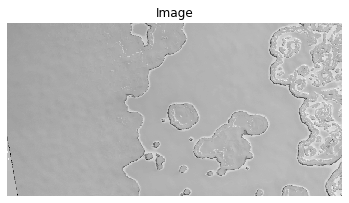

In [16]:
show_image(blue)

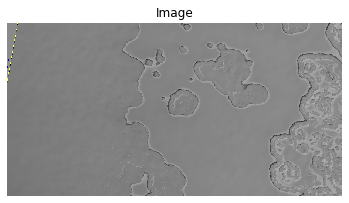

In [17]:
#voltear la imagen Verticalmente
vertically_flipped = np.flipud(halo_image) 
show_image(vertically_flipped)

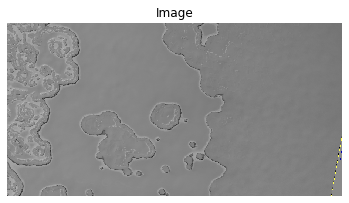

In [18]:
#voltear la imagen Horizontalmente
horizontally_flipped = np.fliplr(halo_image) 
show_image(horizontally_flipped)

# Histogramas con Matplotlib

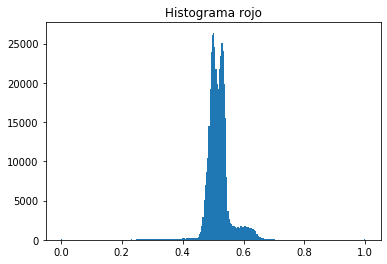

In [19]:
# Obtener el histograma rojo
plt.hist(red.ravel(), bins=256)
plt.title('Histograma rojo')
plt.show()

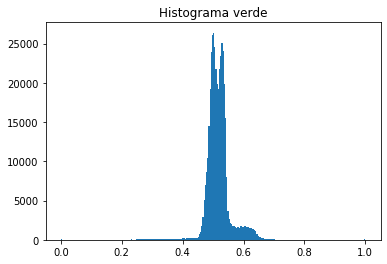

In [20]:
# Obtener el histograma verde
plt.hist(green.ravel(), bins=256)
plt.title('Histograma verde')
plt.show()

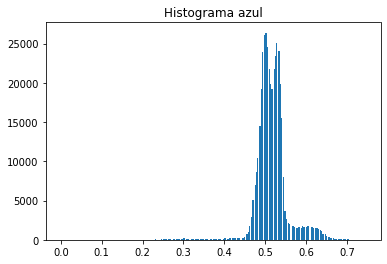

In [21]:
# Obtener el histograma azul
plt.hist(blue.ravel(), bins=256)
plt.title('Histograma azul')
plt.show()

# Thresholding

In [22]:
from PIL import Image
img = Image.fromarray(astro_image).convert('L')
img.save('astrogris.png','png')
print(img)

<PIL.Image.Image image mode=L size=512x512 at 0x6208F1050>


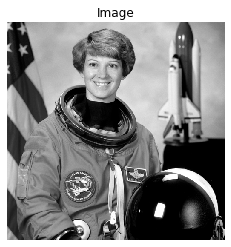

In [23]:
astro_gris = io.imread('astrogris.png')
show_image(astro_gris)

In [43]:
# Obtener valor umbral optimo
thresh = 120
print("umbral:", thresh)

umbral: 120


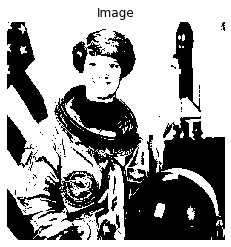

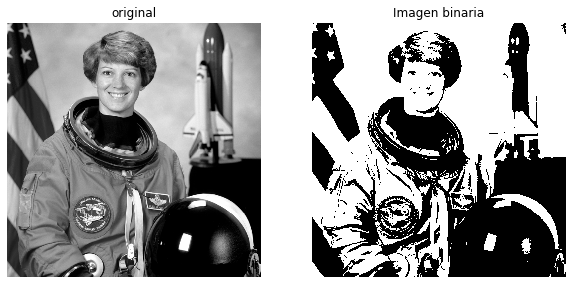

In [45]:
# Aplicamos el umbral a la imagen
binary = astro_gris > thresh
# Mostrar la imagen 
show_image(binary)
plot_comparison(astro_gris, binary, "Imagen binaria")

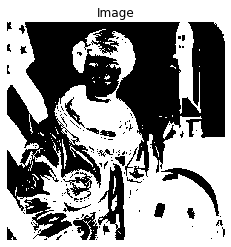

In [26]:
# Aplicamos el umbral invertido a la imagen
inverted_binary = astro_gris <= thresh
# Mostrar la imagen 
show_image(inverted_binary)

## Try_all_threshold 

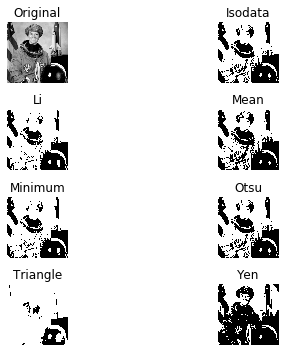

In [27]:
from skimage.filters import try_all_threshold 
from matplotlib.pyplot import *
#Obtengo todas las imagenes resultantes
fig, ax = try_all_threshold(astro_gris, verbose=False)
# Mostrando resultados plots
plt.show(fig, ax)

# Threshold_otsu (Global)

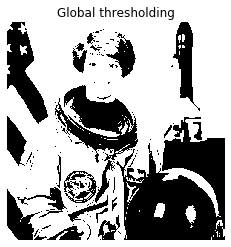

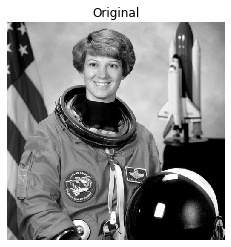

In [28]:
# Importo la función threshold_otsu  
from skimage.filters import threshold_otsu 
# Obtengo el valor de umbral óptimo
thresh = threshold_otsu(astro_gris)
# Aplico thresholding a la imagen
binary_global = astro_gris > thresh
#Mostrar imagen original y binarizada
show_image(binary_global, 'Global thresholding')
show_image(astro_gris, 'Original')

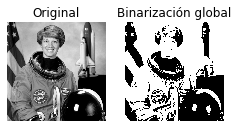

In [29]:
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2, sharex=ax[0], sharey=ax[0])

ax[0].imshow(astro_gris, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(binary_global, cmap=plt.cm.gray)
ax[1].set_title('Binarización global')
ax[1].axis('off')

plt.show()

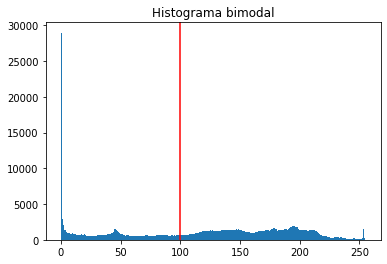

In [30]:
ax[1] = plt.subplot()
ax[1].hist(astro_gris.ravel(), bins=256)
ax[1].set_title('Histograma bimodal')
ax[1].axvline(thresh, color='r')
plt.show()

# Threshold_local (Local)

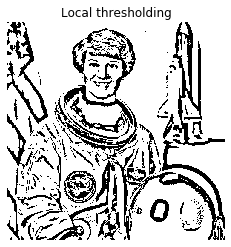

In [31]:
from skimage.filters import threshold_local 

# Set the block size to 35
block_size = 35
# Obtain the optimal local thresholding
local_thresh = threshold_local(astro_gris, block_size, offset=10)
# Apply local thresholding and obtain the binary image
binary_local = astro_gris > local_thresh
# Show the original and binarized image
show_image(binary_local, 'Local thresholding')

## Morfologías

In [32]:
def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, 
                                   figsize=(10, 8), 
                                   sharex=True, 
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray) 
    ax1.set_title('original') 
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray) 
    ax2.set_title(title_filtered) 
    ax2.axis('off')

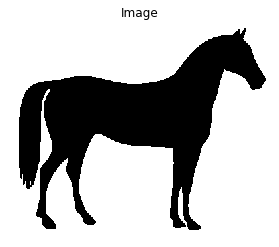

In [33]:
from skimage import morphology 
image_horse = data.horse()
show_image(image_horse)

In [34]:
selem = morphology.square(3)
selem

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

## EROSION

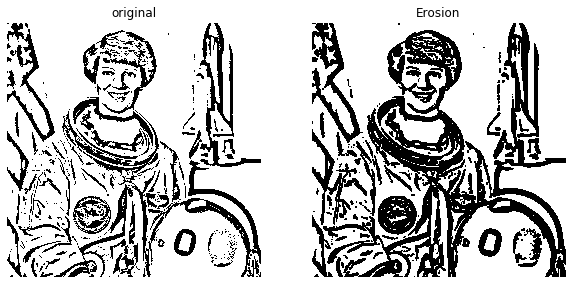

In [35]:
# con selem
eroded_image = morphology.binary_erosion(binary_local, 
                                         selem=selem)
plot_comparison(binary_local, eroded_image, 'Erosion')
  

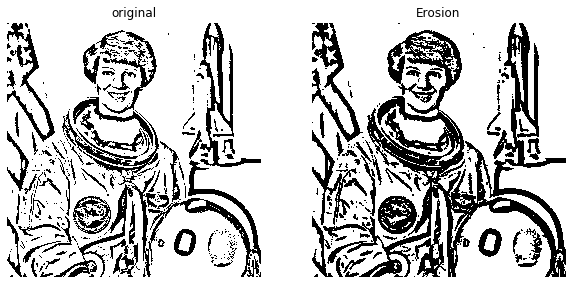

In [37]:
# sin selem
eroded_image = morphology.binary_erosion(binary_local)
plot_comparison(binary_local, eroded_image, 'Erosion')

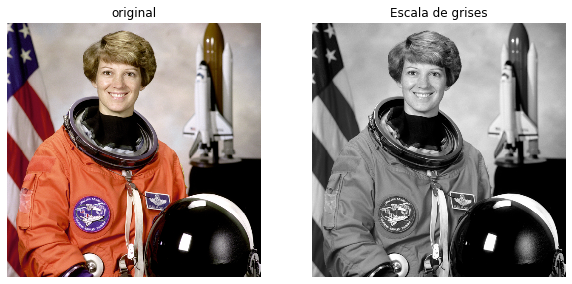

In [40]:
plot_comparison(astro_image, astro_gris, 'Escala de grises')

# DILATACIÓN

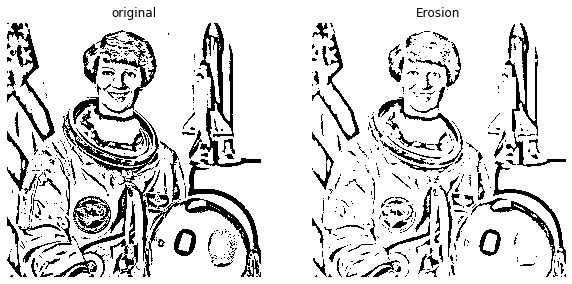

In [63]:
from skimage import morphology
# Obtain dilated image, using binary dilation
dilated_image = morphology.binary_dilation(binary_local)
# See results
plot_comparison(binary_local, dilated_image, 'Erosion')